In [27]:
%matplotlib notebook

In [28]:
# Dependencies
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from scipy.stats import sem

In [29]:
# Import the Boston housing data set from sklearn and get description
boston_dataset = load_boston()
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [30]:
# Read Boston housing data into a Pandas dataframe
housing_data = pd.DataFrame(data=boston_dataset.data,columns=boston_dataset.feature_names)
housing_data['MEDV'] = boston_dataset.target
housing_data.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [42]:
# Create a bunch of samples, each with sample size of 20

#with replacement
nsamples = 25
div = 50
samples = [housing_data.sample(div) for x in range(0,nsamples)]

# #without replacement
# big_sample = housing_data.sample(nsamples * div).reset_index()
# samples_wor = [big_sample[n*20:(n+1)*20] for n in range(0,nsamples)]

In [43]:
# Calculate standard error of means
means = [s.MEDV.mean() for s in samples]

sems = [sem(s.MEDV) for s in samples]

<IPython.core.display.Javascript object>


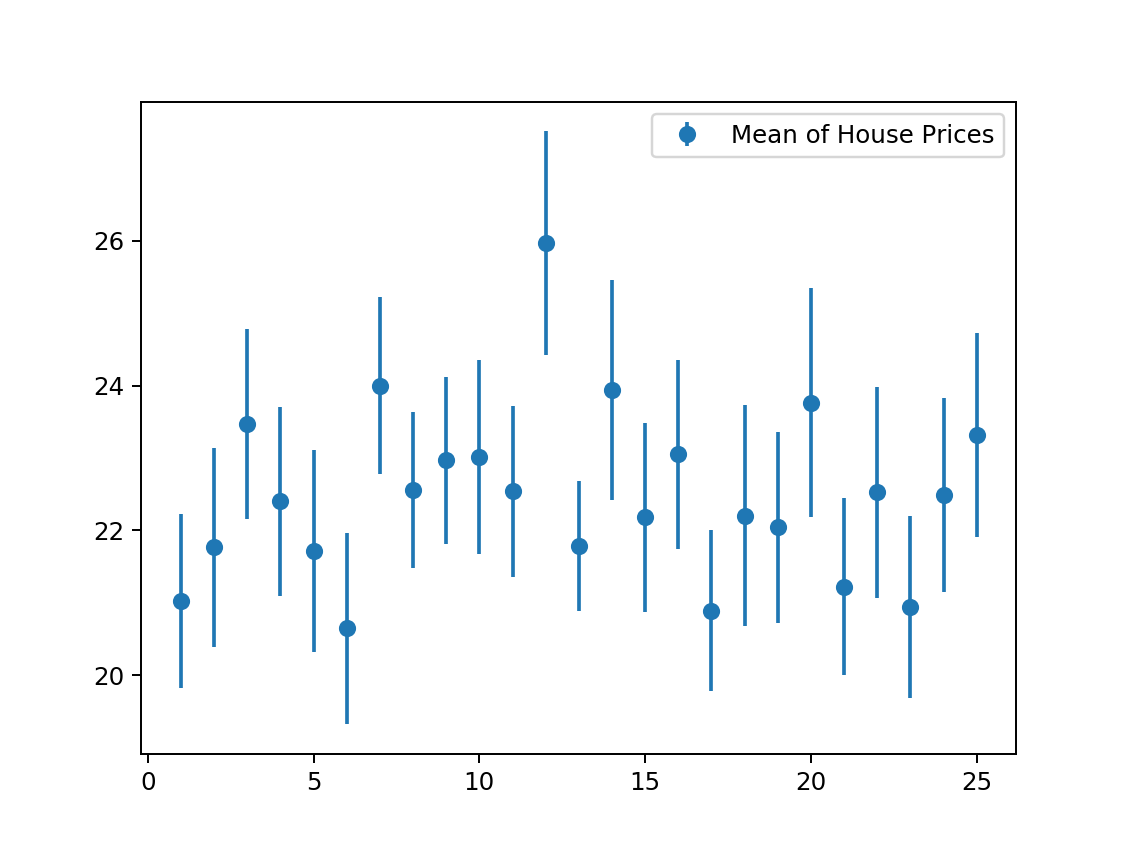

Smallest sem  13
Closest to the true mean  11  with value  22.538000000000007


In [46]:
# Determine which sample's mean is closest to the population mean
fig, ax = plt.subplots()
ax.errorbar(np.arange(0, len(samples), 1)+1, means, yerr=sems, fmt="o", label="Mean of House Prices")
plt.legend(loc="best")

print("Smallest sem ",np.argmin(sems)+1)
print("Closest to the true mean ",
      np.argmin(np.abs(np.array(means) - housing_data["MEDV"].mean()))+1, " with value ",
    means[np.argmin(np.abs(np.array(means) - housing_data["MEDV"].mean()))]
     )


In [ ]:
# Compare to the population mean

In [ ]:
# Plot sample means with error bars